# Data explore

Explore data table from SWRpipeline_AllSessions.m

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [56]:
tex_fonts = {
#     # Use LaTeX to write all text
#     "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "svg.fonttype": 'none'
}
plt.style.use('seaborn-paper')
plt.rcParams.update(tex_fonts)


%config InlineBackend.figure_format = 'retina'

In [17]:
df = pd.read_csv(r'D:\projects\ripple_heterogeneity\df.csv')
df

particip     FRall  FRparticip   nSpkAll  nSpkParticip  \
0      0.013629  0.085265    6.284407  0.013629      1.000000   
1      0.025554  0.191845    7.247999  0.030664      1.200000   
2      0.112436  0.767381    6.619818  0.122658      1.090909   
3      0.023850  0.149213    6.212536  0.023850      1.000000   
4      0.017036  0.106581    6.156583  0.017036      1.000000   
...         ...       ...         ...       ...           ...   
20360  0.221860  1.717076    7.587856  0.270799      1.220588   
20361  0.406199  3.568621    8.739984  0.562806      1.385542   
20362  0.287113  2.296330    7.882651  0.362153      1.261364   
20363  0.313214  3.051430    9.619482  0.481240      1.536458   
20364  0.181077  1.251603    6.753654  0.197390      1.090090   

                 cellType region  CA1depth  ID epoch ca1_layer  
0      Narrow interneuron    CA1       3.0   0   pre   unknown  
1          Pyramidal Cell    CA1      -4.0   3   pre       sup  
2      Narrow interneuron    CA1     -11.0   0   pre   unknown  
3      Narrow interneuron    CA1      -8.0   0   pre   unknown  
4      Narrow interneuron    CA3     -19.0   0   pre   unknown  
...                   ...    ...       ...  ..   ...       ...  
20360      Pyramidal Cell    CA1       0.0   2  post       mid  
20361      Pyramidal Cell    CA1       0.0   2  post       mid  
20362      Pyramidal Cell    CA1       9.0   1  post      deep  
20363      Pyramidal Cell    CA1      -1.0   3  post       sup  
20364      Pyramidal Cell    CA1       9.0   1  post      deep  

[20365 rows x 11 columns]

### There does not seem to be any obvious differences between epochs (pre/task/post)

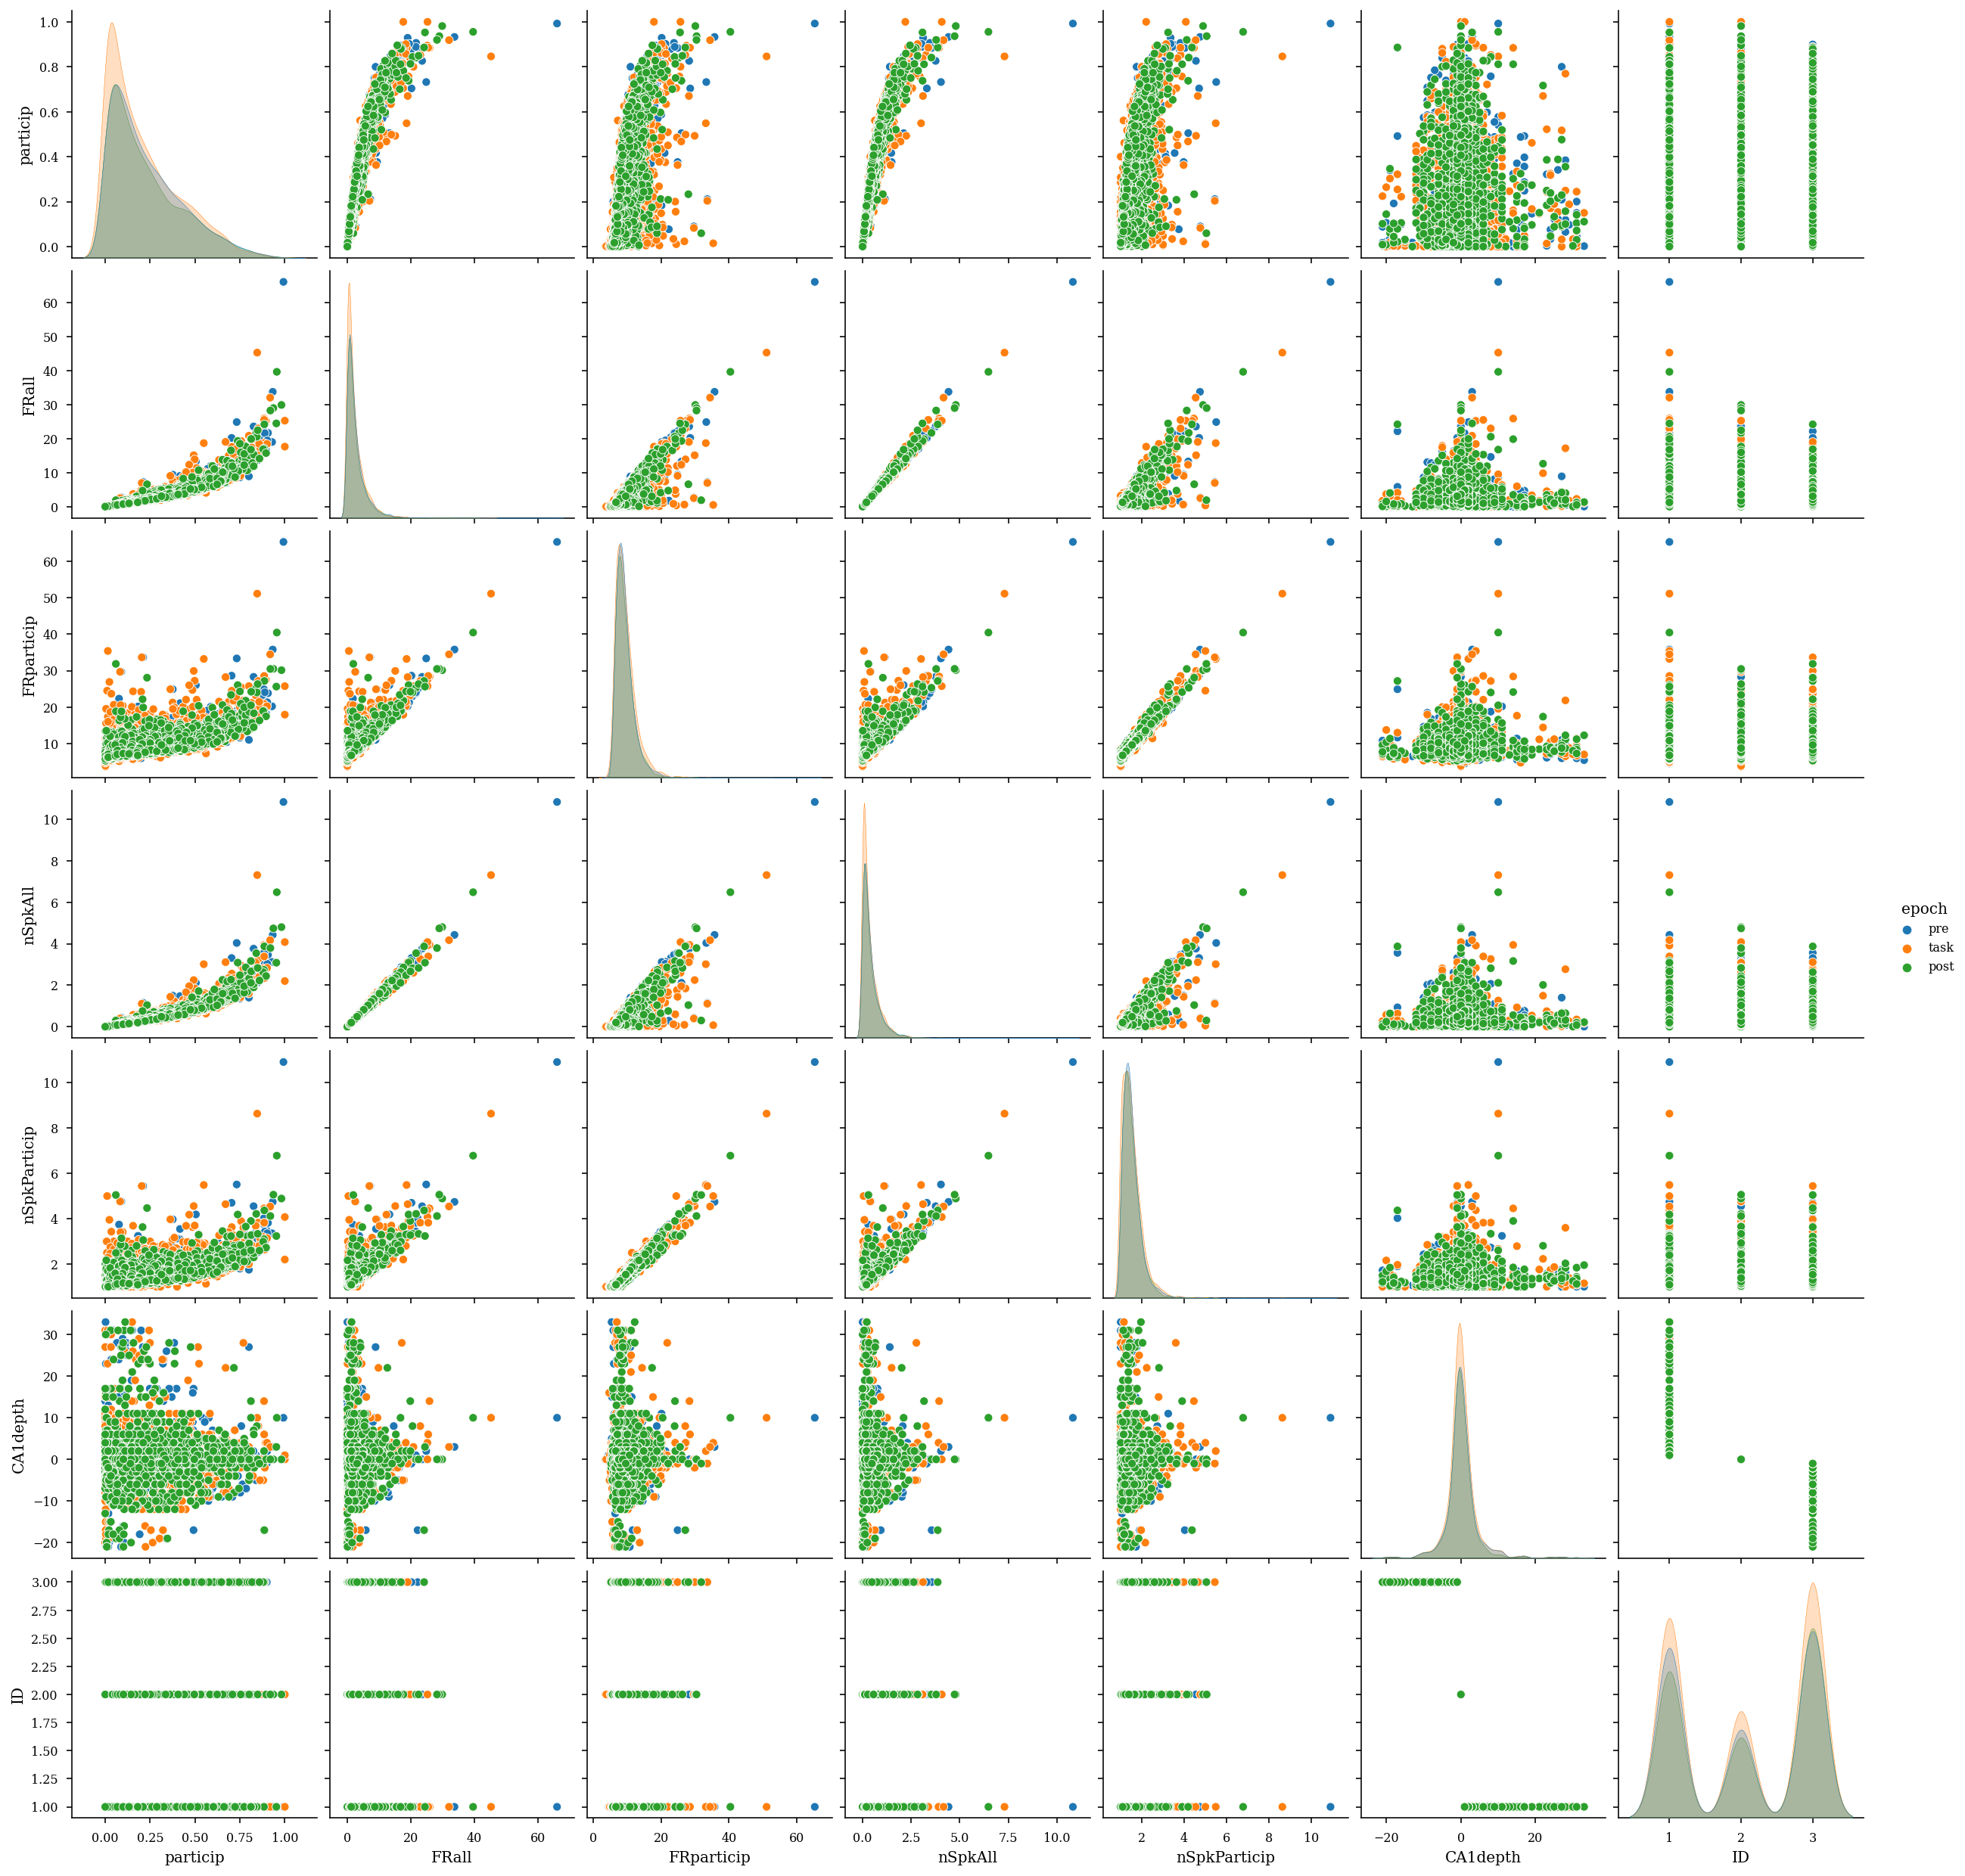

In [20]:
sns.pairplot(df[(df.region=='CA1') & (df.cellType=="Pyramidal Cell")],hue="epoch")

### Because of the lack of differences in epoch, lets look at between ca1 cell layers (deep/mid/sup)

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


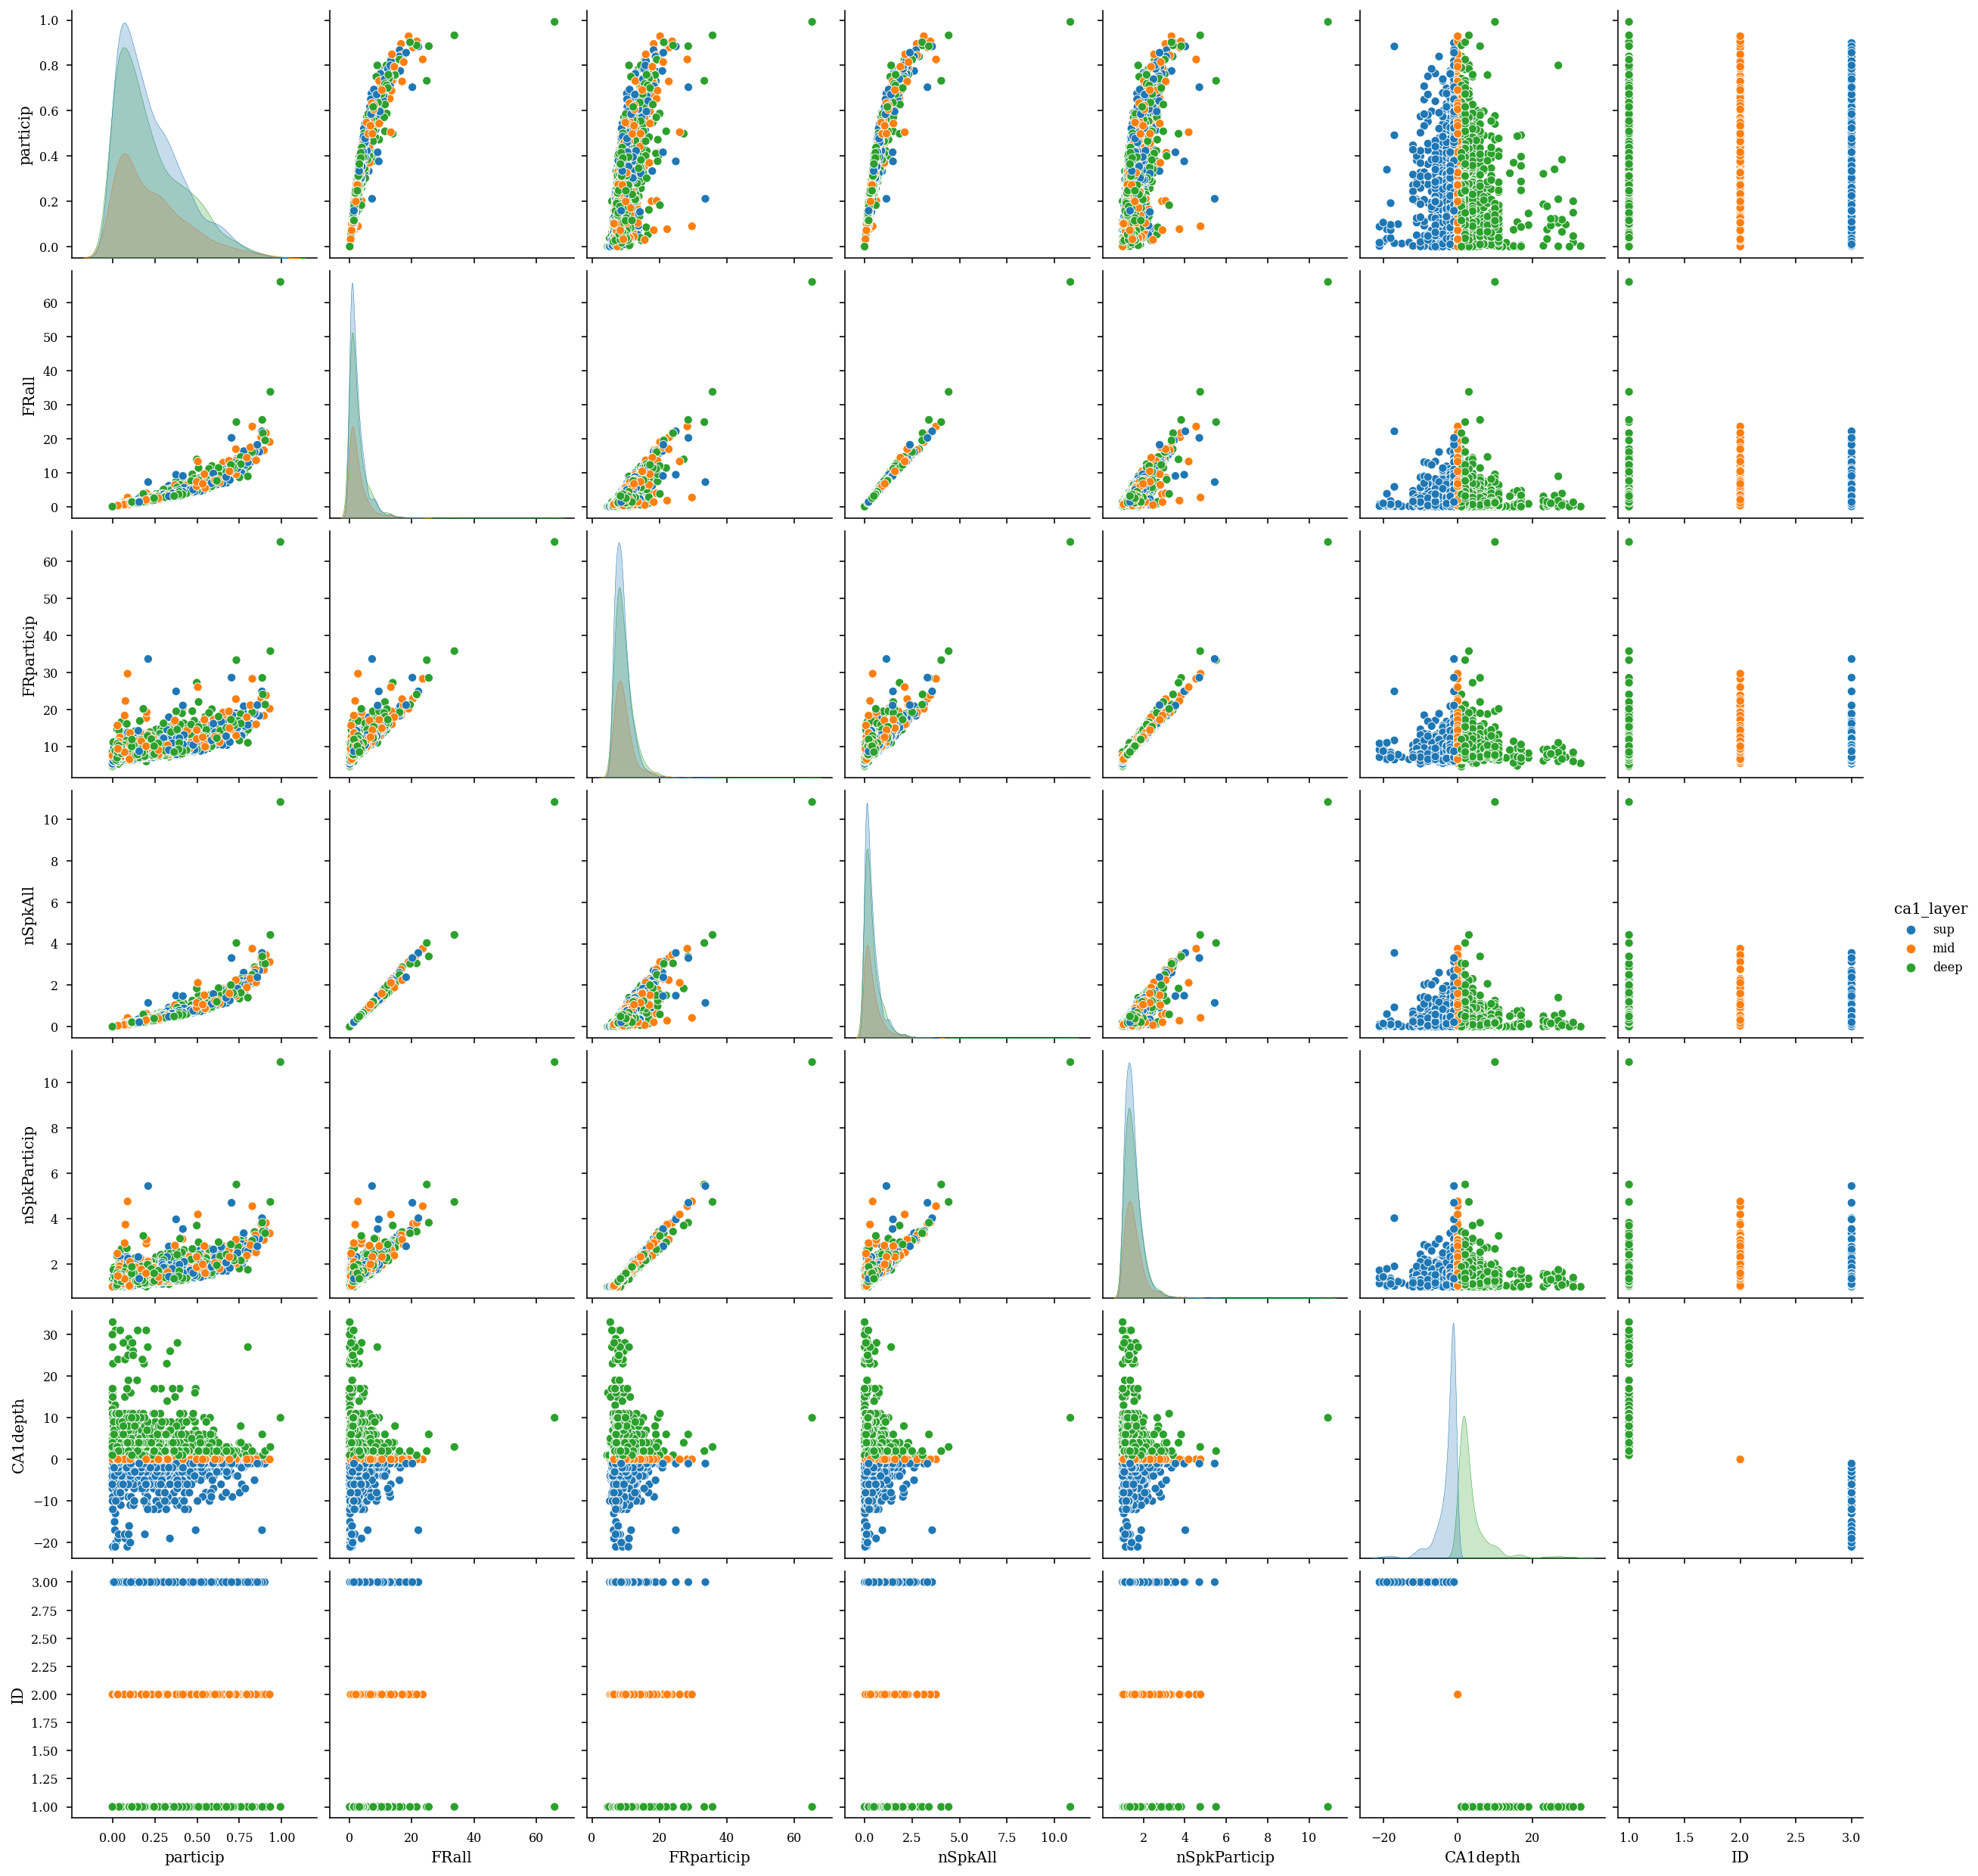

In [19]:
sns.pairplot(df[(df.epoch=='pre') & (df.region=='CA1') & (df.cellType=="Pyramidal Cell")],hue="ca1_layer")


### there should be difference in fr and participation between the cell types

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


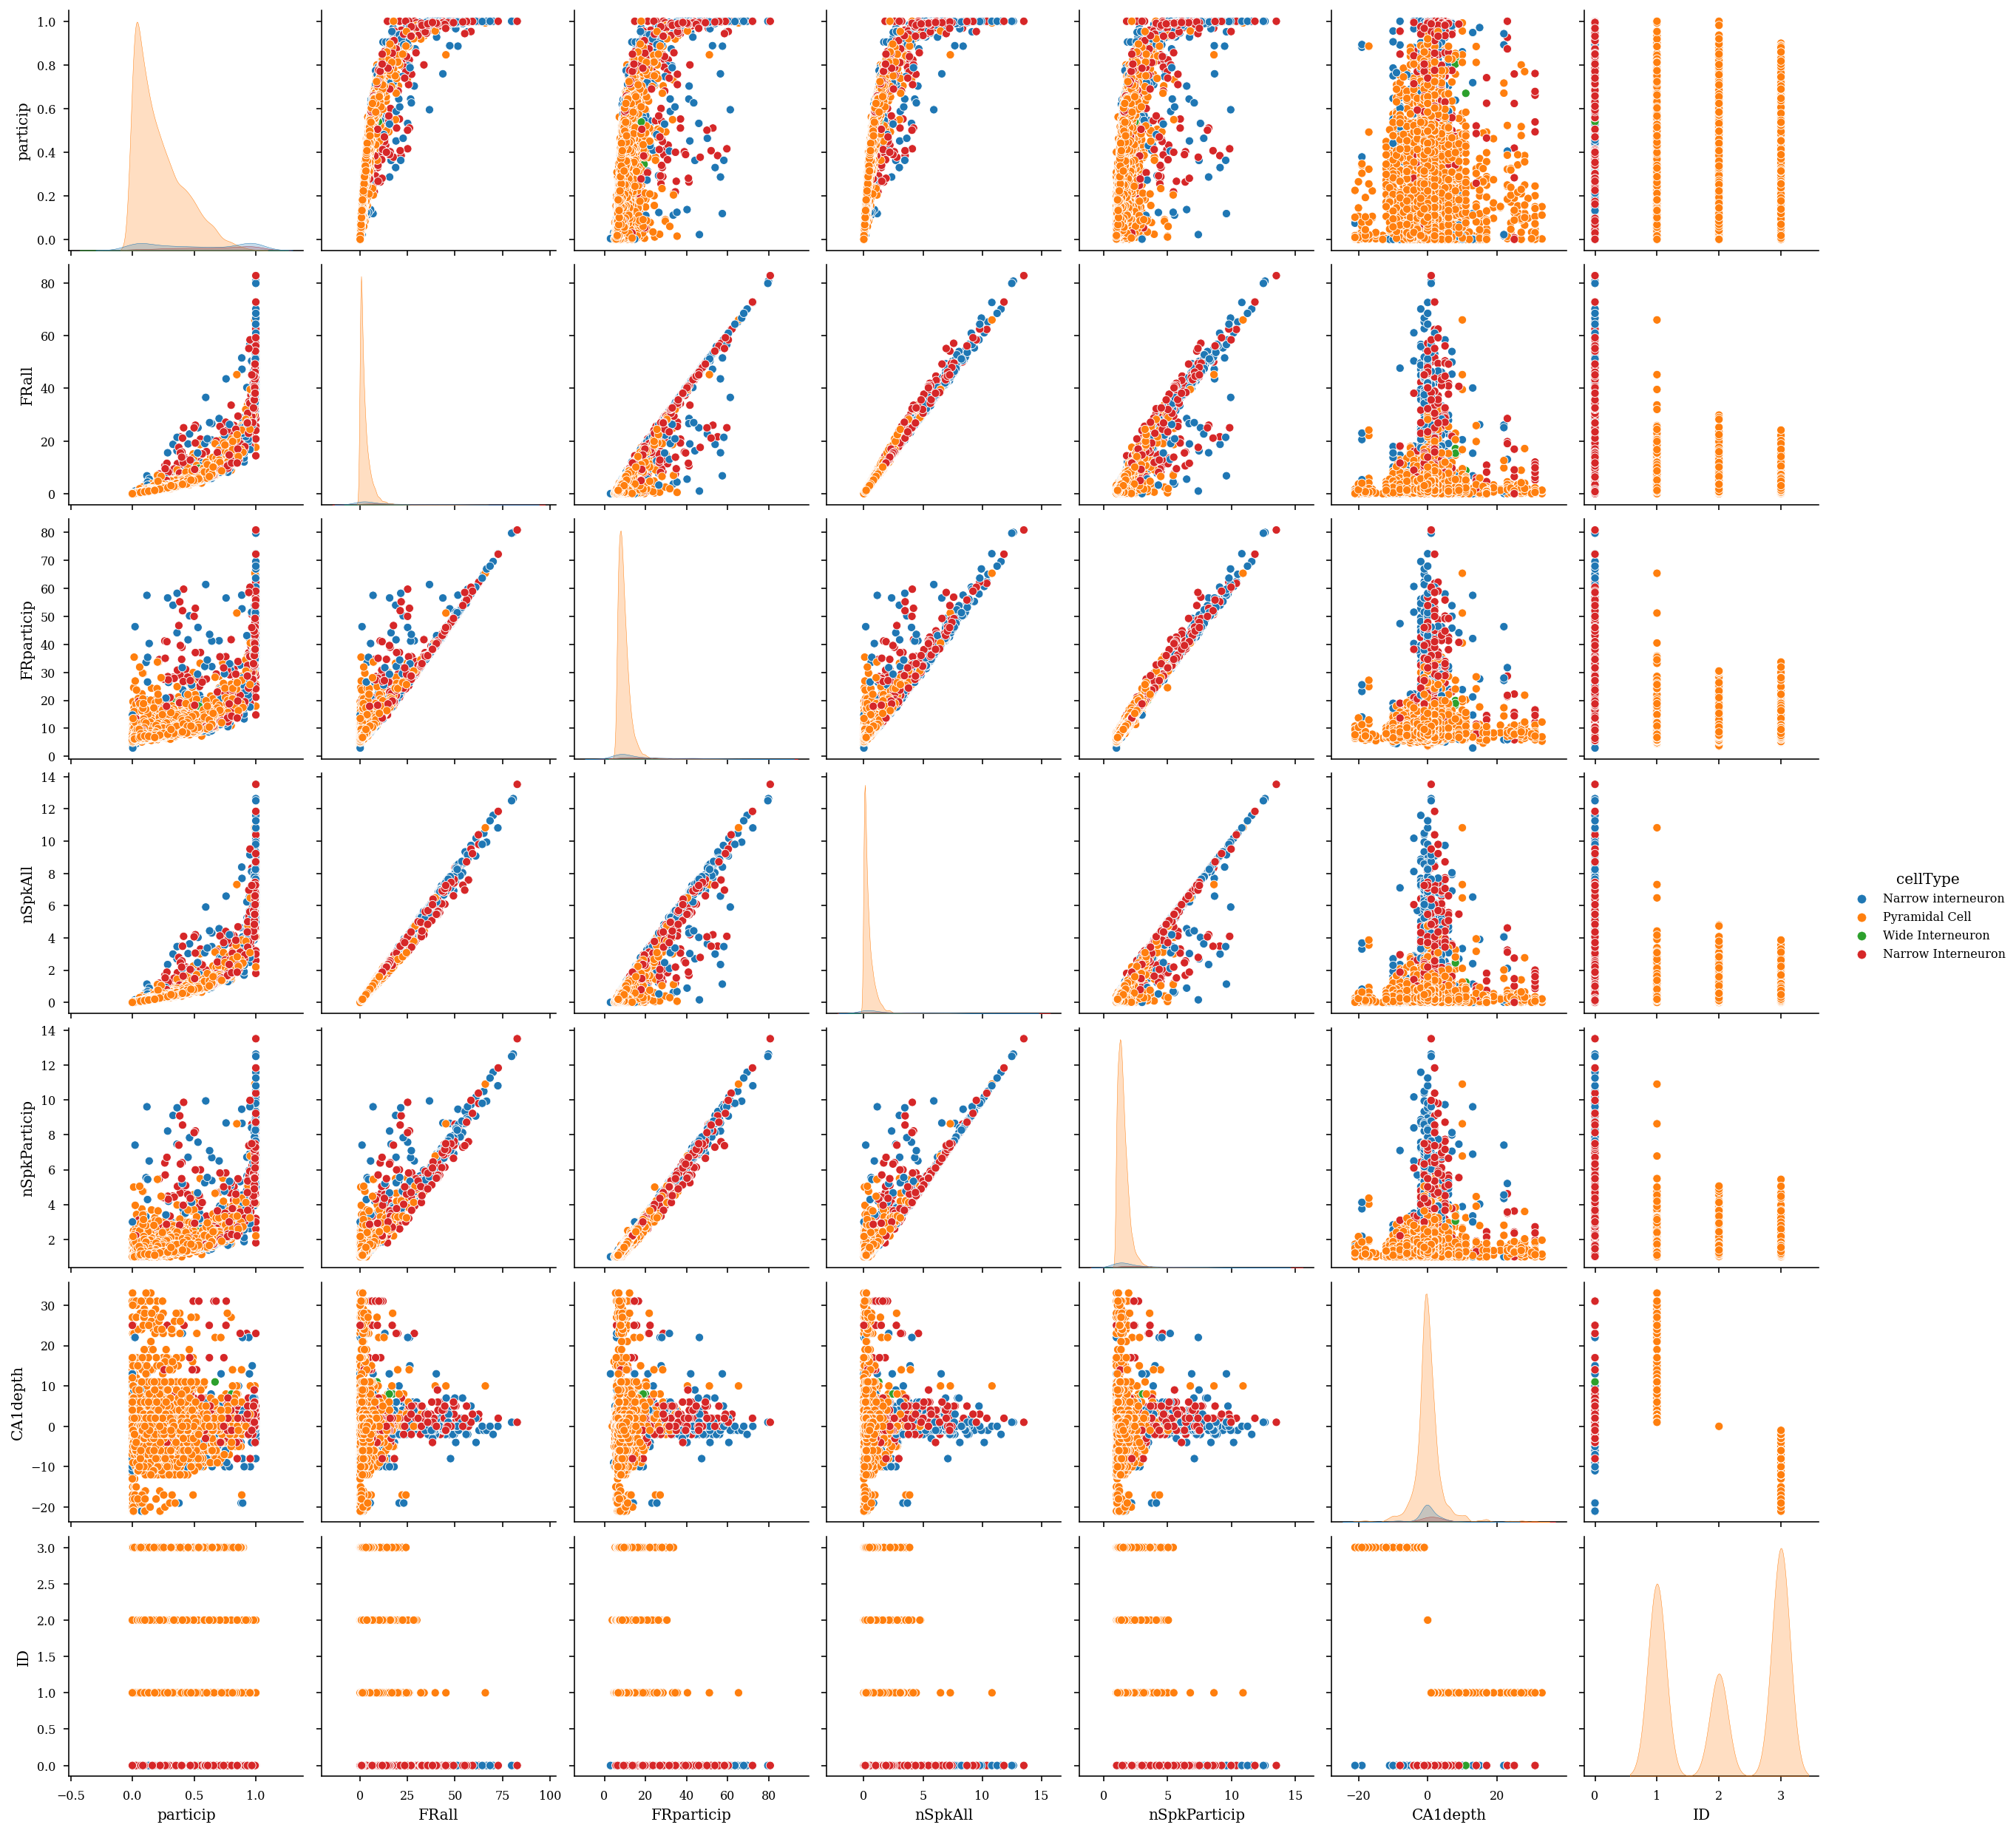

In [25]:
sns.pairplot(df[(df.region=='CA1')],hue="cellType")


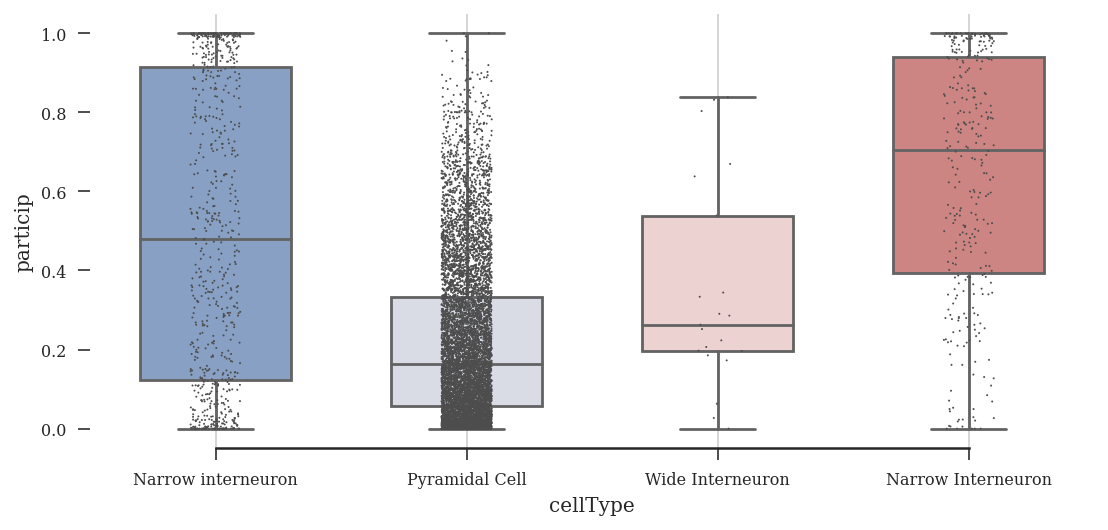

In [46]:
# sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(9, 4))
# ax.set_yscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="cellType", y="particip", data=df[(df.region=='CA1')],
            whis=[0, 100], width=.6, palette="vlag",saturation=1)

# Add in points to show each observation
sns.stripplot(x="cellType", y="particip", data=df[(df.region=='CA1')],
              size=1, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
# ax.set(ylabel="")
sns.despine(trim=True, left=True)

<AxesSubplot:xlabel='cellType', ylabel='particip'>

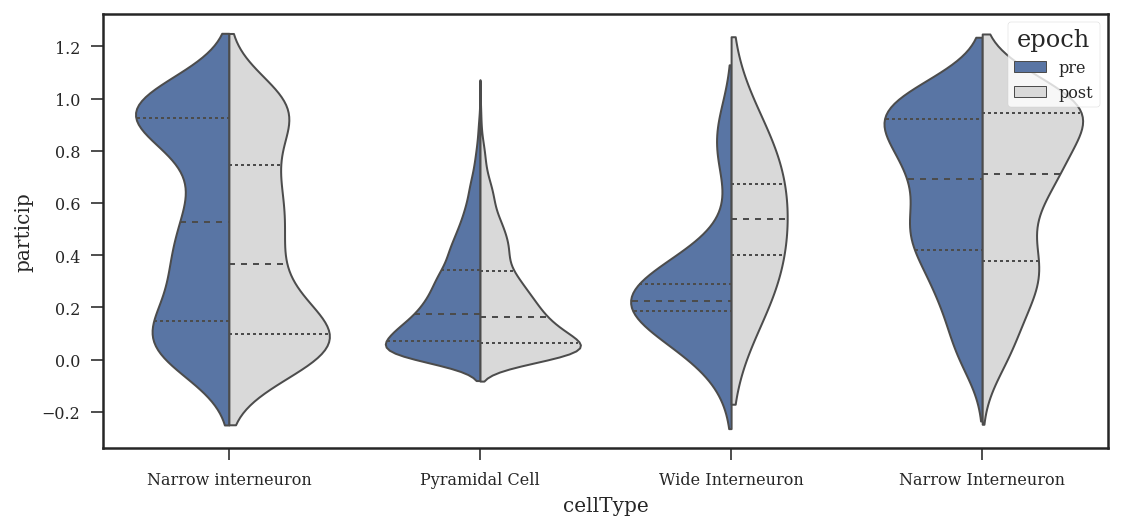

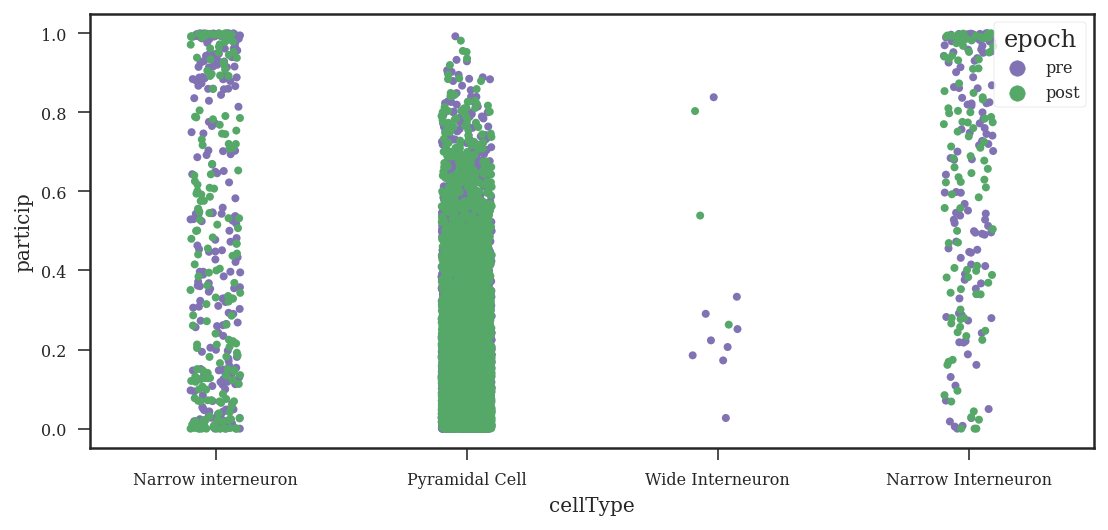

In [55]:
f, ax = plt.subplots(figsize=(9, 4))

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=df[((df.epoch == 'pre') | (df.epoch == 'post')) & (df.region=='CA1')], x="cellType", y="particip", hue="epoch",
               split=True, inner="quart", linewidth=1,
               palette={"pre": "b", "post": ".85"})

f, ax = plt.subplots(figsize=(9, 4))
# sns.boxplot(x="cellType", y="particip",
#             hue="epoch", palette=["m", "g"],
#             data=df[((df.epoch == 'pre') | (df.epoch == 'post')) & (df.region=='CA1')])

sns.stripplot(x="cellType", y="particip",hue="epoch", data=df[((df.epoch == 'pre') | (df.epoch == 'post')) & (df.region=='CA1')],
              size=4,  palette=["m", "g"], linewidth=0)